In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [5]:
# Connection details
MONGO_URI = os.getenv("MONGO_URI")
DB_NAME = "aqi_predictor"
COLLECTION_NAME = "raw_data"

def get_full_raw_dataset():
    print("Connecting to MongoDB...")
    client = MongoClient(MONGO_URI)
    db = client[DB_NAME]
    collection = db[COLLECTION_NAME]

    # Fetch full dataset
    print("Downloading full dataset...")
    cursor = collection.find({}, {"_id": 0})
    
    # Convert to list and then DataFrame
    df = pd.DataFrame(list(cursor))
    
    print(f"Success! Loaded {len(df)} records with {len(df.columns)} columns.")
    return df

In [7]:
df = get_full_raw_dataset()

Connecting to MongoDB...
Success! Loaded 18024 records with 12 columns.


In [9]:
df.head()

,datetime,co,humidity,temperature,wind_speed,pm2_5,pm10,dust,o3,wind_dir,no2,so2
0,2024-01-18 19:00:00,941.0,57.973820,18.100000,9.422101,56.900002,85.900002,6.0,63.0,46.548111,38.0,23.400000
1,2024-01-18 20:00:00,870.0,56.808830,17.299999,9.957108,55.599998,85.000000,8.0,66.0,49.398785,29.5,21.700001
2,2024-01-18 21:00:00,805.0,58.960846,16.500000,10.691453,53.900002,83.099998,9.0,70.0,44.999897,22.4,20.299999
3,2024-01-18 22:00:00,729.0,61.259380,15.900000,11.525623,51.299999,80.099998,10.0,76.0,38.659828,15.4,19.400000
4,2024-01-18 23:00:00,659.0,64.352943,15.500000,11.525623,48.299999,76.400002,11.0,83.0,38.659828,9.9,18.900000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18024 entries, 0 to 18023
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     18024 non-null  datetime64[ns]
 1   co           18024 non-null  float64       
 2   humidity     18024 non-null  float64       
 3   temperature  18024 non-null  float64       
 4   wind_speed   18024 non-null  float64       
 5   pm2_5        18024 non-null  float64       
 6   pm10         18024 non-null  float64       
 7   dust         18024 non-null  float64       
 8   o3           18024 non-null  float64       
 9   wind_dir     18024 non-null  float64       
 10  no2          18024 non-null  float64       
 11  so2          18024 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 1.7 MB


In [13]:
df.isnull().sum()

datetime       0
co             0
humidity       0
temperature    0
wind_speed     0
pm2_5          0
pm10           0
dust           0
o3             0
wind_dir       0
no2            0
so2            0
dtype: int64

In [15]:
df['datetime'].duplicated().sum()

0

In [17]:
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [19]:
df.head()

,datetime,co,humidity,temperature,wind_speed,pm2_5,pm10,dust,o3,wind_dir,no2,so2,year,day,hour
0,2024-01-18 19:00:00,941.0,57.973820,18.100000,9.422101,56.900002,85.900002,6.0,63.0,46.548111,38.0,23.400000,2024,18,19
1,2024-01-18 20:00:00,870.0,56.808830,17.299999,9.957108,55.599998,85.000000,8.0,66.0,49.398785,29.5,21.700001,2024,18,20
2,2024-01-18 21:00:00,805.0,58.960846,16.500000,10.691453,53.900002,83.099998,9.0,70.0,44.999897,22.4,20.299999,2024,18,21
3,2024-01-18 22:00:00,729.0,61.259380,15.900000,11.525623,51.299999,80.099998,10.0,76.0,38.659828,15.4,19.400000,2024,18,22
4,2024-01-18 23:00:00,659.0,64.352943,15.500000,11.525623,48.299999,76.400002,11.0,83.0,38.659828,9.9,18.900000,2024,18,23


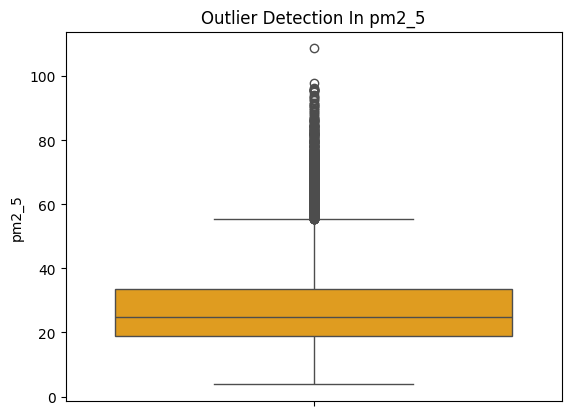

In [21]:
ax = sns.boxplot(data=df, y='pm2_5',color='orange')
ax.set_title('Outlier Detection In pm2_5')
plt.show()

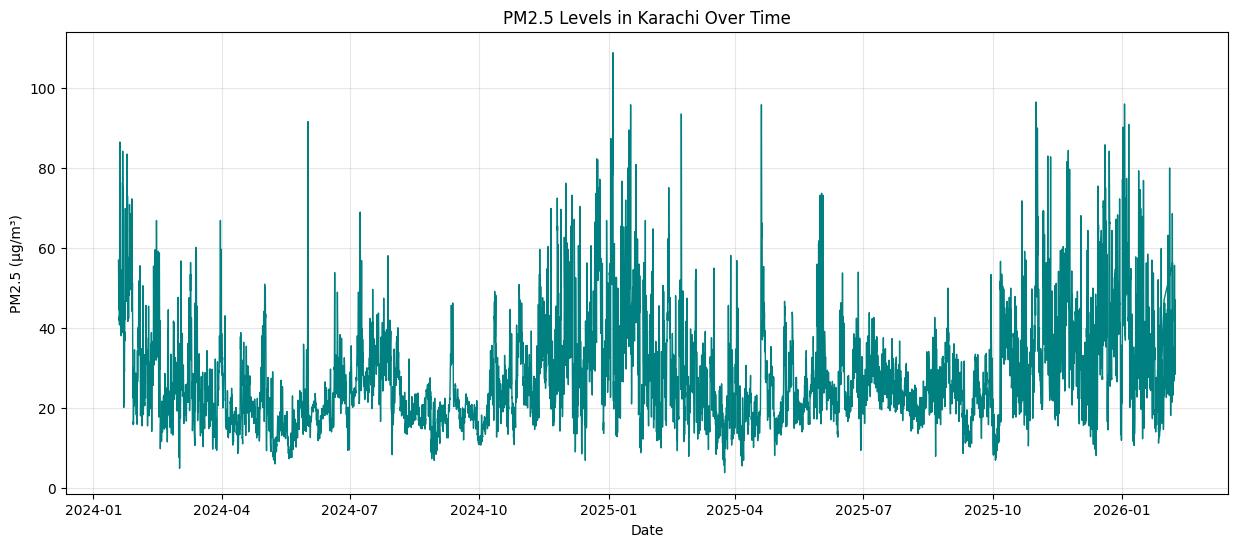

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['pm2_5'], color='teal', linewidth=1)
plt.title('PM2.5 Levels in Karachi Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, alpha=0.3)
plt.show()

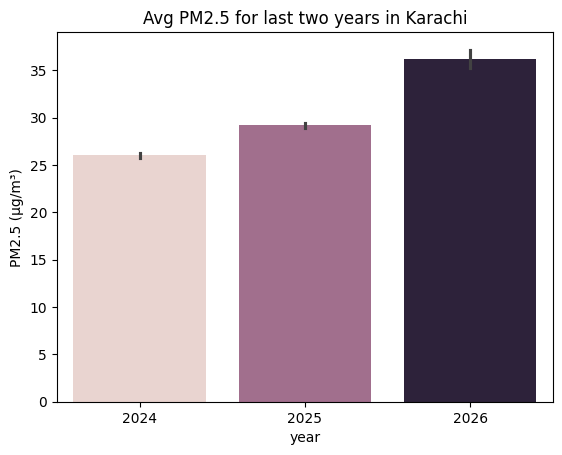

In [24]:
ax = sns.barplot(data=df, x='year', y='pm2_5', estimator = 'mean', hue='year',legend=False)
ax.set_ylabel('PM2.5 (µg/m³)')
ax.set_title('Avg PM2.5 for last two years in Karachi')
plt.show()

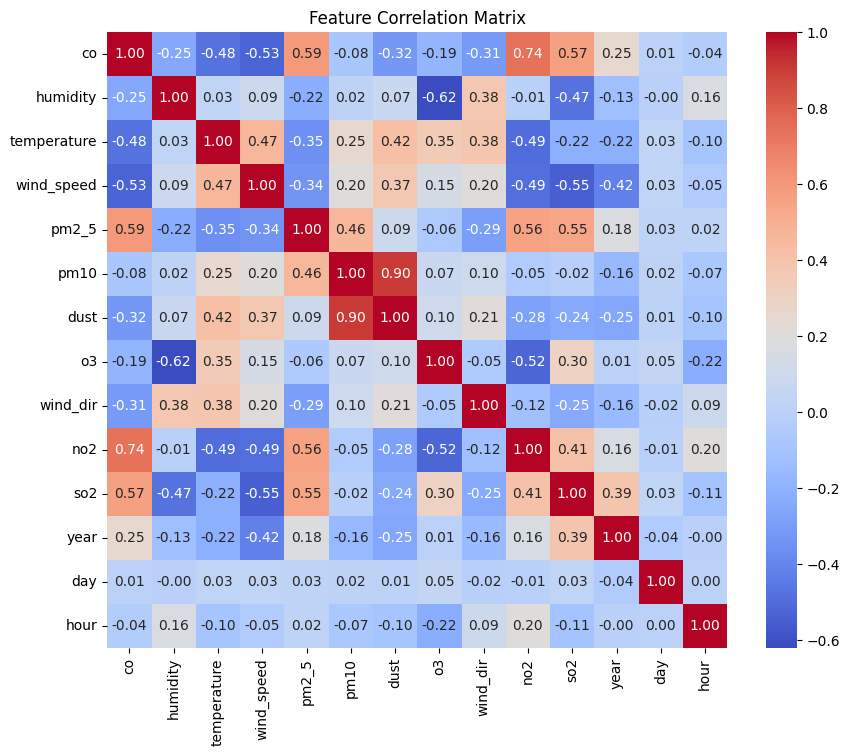

In [26]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

Top Predictors for PM2.5:
pm2_5          1.000000
co             0.592437
no2            0.562114
so2            0.546090
pm10           0.462558
datetime       0.192876
year           0.175894
dust           0.091584
day            0.025083
hour           0.022523
o3            -0.058757
humidity      -0.222897
wind_dir      -0.292988
wind_speed    -0.340839
temperature   -0.354296
Name: pm2_5, dtype: float64


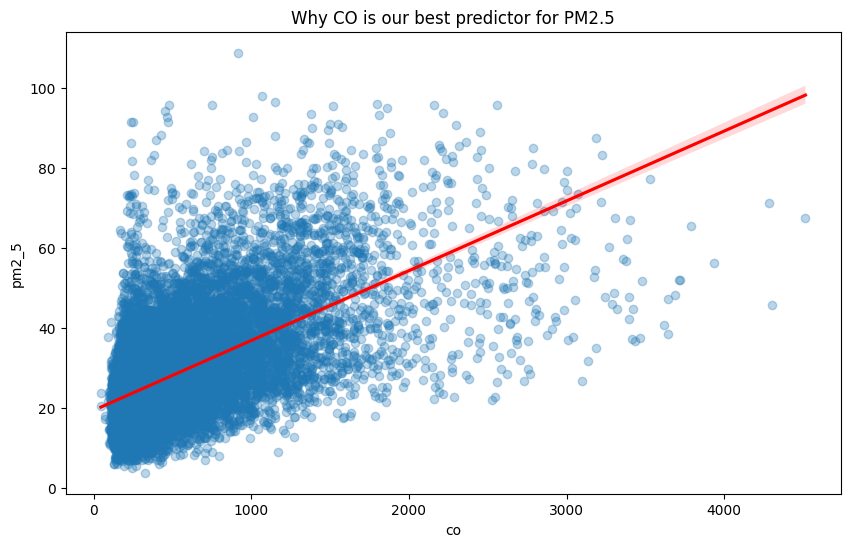

In [27]:
# Identify the top factors affecting PM2.5
top_correlations = df.corr()['pm2_5'].sort_values(ascending=False)

print("Top Predictors for PM2.5:")
print(top_correlations)

# Plotting the most important relationship
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='co', y='pm2_5', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Why CO is our best predictor for PM2.5')
plt.show()

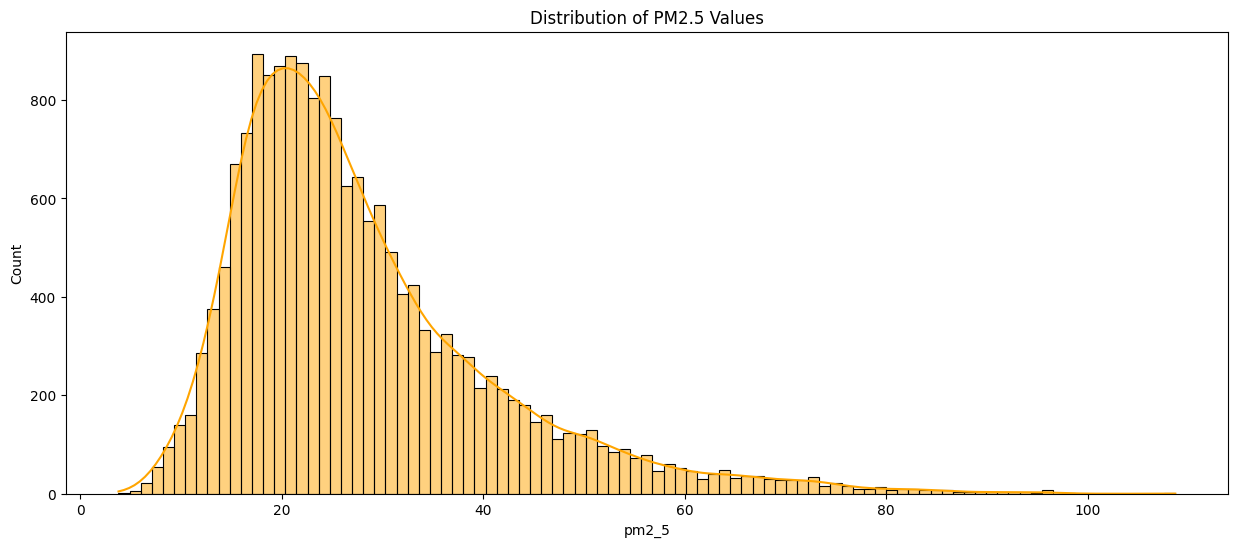

In [29]:
plt.figure(figsize=(15, 6))
sns.histplot(df['pm2_5'], kde=True, color='orange')
plt.title('Distribution of PM2.5 Values')
plt.show()

In [30]:
def generate_aqi_category(pm25):
    if pm25 is None or pm25 < 0:
        return "Unknown"
    elif pm25 <= 12.0:
        return "Good"
    elif pm25 <= 35.4:
        return "Moderate"
    elif pm25 <= 55.4:
        return "Unhealthy for Sensitive Groups"
    elif pm25 <= 150.4:
        return "Unhealthy"
    elif pm25 <= 250.4:
        return "Very Unhealthy"
    else:
        return "Hazardous"

In [32]:
df['AQI Category'] = df['pm2_5'].apply(generate_aqi_category)

In [33]:
df['AQI Category'].value_counts()

AQI Category
Moderate                          13408
Unhealthy for Sensitive Groups     3173
Unhealthy                           837
Good                                606
Name: count, dtype: int64

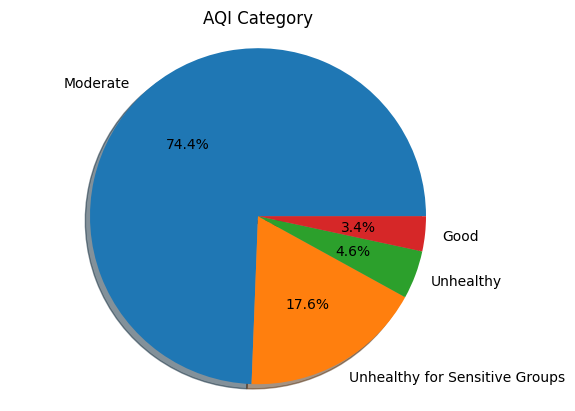

In [36]:
counts = df['AQI Category'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%0.1f%%', shadow=True)
plt.title('AQI Category')

plt.axis('equal')
plt.show()